In [1]:
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.signal import get_window
import matplotlib.pyplot as plt

In [2]:
# Sampling frequency
fs = 1024

# Create time vector
time_end = 2
time = np.arange(0, time_end, 1/fs)

signal_length = len(time)

# Repeat of signal for plotting
n_repetitions = 3
time_repeated = np.arange(0, n_repetitions*time_end, 1/fs)

# Calculate frequencies for FFT
freq = rfftfreq(signal_length, 1/fs)

# Periodic signal in time window

In [3]:
# Create periodic time signal
A1 = 1.0
f1 = 2.0
y1 = A1 * np.sin(2*np.pi * f1 * time)

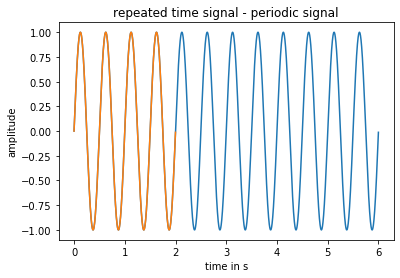

In [4]:
# Plot signal multiple times
plt.plot(time_repeated, np.tile(y1, n_repetitions))
plt.plot(time, y1)
plt.title('repeated time signal - periodic signal')
plt.xlabel('time in s')
plt.ylabel('amplitude');

In [5]:
# Calculate FFT of periodic signal
yfft1 = 2 * rfft(y1) / signal_length

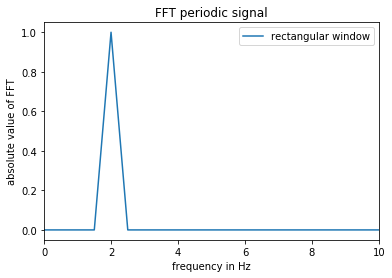

In [6]:
# Plot absolute value of FFT
plt.plot(freq, abs(yfft1))
plt.xlim(0, 10.0)
plt.legend(['rectangular window']) 
plt.title('FFT periodic signal')
plt.xlabel('frequency in Hz')
plt.ylabel('absolute value of FFT');

With a periodic signal, no leakage occurs. In the frequency domain only an absolute value > 0 can be seen at the frequency which is present in the time signal. All other frequencies show an amplitude of 0.

# Non-periodic signal in time window

In [7]:
# Create non-periodic time signal
A2 = 1.0
f2 = 1.75
y2 = A2 * np.sin(2*np.pi * f2 * time)

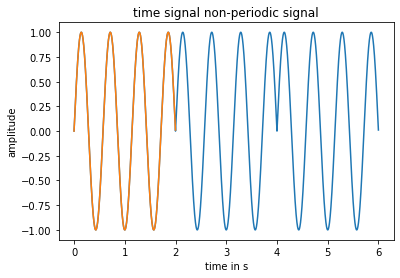

In [8]:
# Plot signal multiple times
plt.plot(time_repeated, np.tile(y2, n_repetitions))
plt.plot(time, y2)
plt.title('time signal non-periodic signal')
plt.xlabel('time in s')
plt.ylabel('amplitude');

In [9]:
# Calculate FFT of non-periodic signal
yfft2 = 2 * rfft(y2) / signal_length

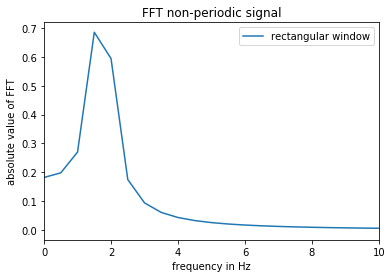

In [10]:
# Plot absoluate value of FFT
plt.plot(freq, abs(yfft2))
plt.xlim(0, 10.0)
plt.legend(['rectangular window']) 
plt.title('FFT non-periodic signal')
plt.xlabel('frequency in Hz')
plt.ylabel('absolute value of FFT');

In the figure above is the effect of leakage visible: The representation in the frequency domain shows amplitudes at frequencies, which are not present in the time signal.

In [11]:
# Calculate FFT of non-periodic signal with hann window
hann_window = get_window('hann', signal_length)
hann_correction = signal_length / sum(hann_window)
y2hann = y2 * hann_window
yfft2hann = hann_correction * 2 * rfft(y2hann) / signal_length

In [12]:
# Calculate FFT of non-periodic signal with flattop window
flattop_window = get_window('flattop', signal_length)
flattop_correction = signal_length / sum(flattop_window)
y2flattop = y2 * flattop_window
yfft2flattop = flattop_correction * 2 * rfft(y2flattop) / signal_length

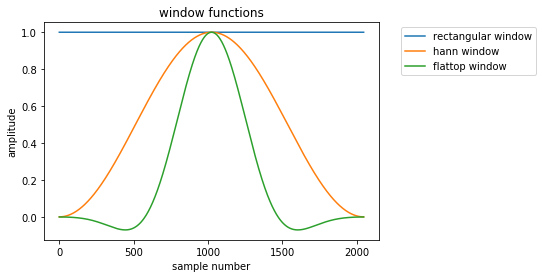

In [13]:
# Plot window functions
plt.plot(get_window('rectangular', signal_length))
plt.plot(hann_window)
plt.plot(flattop_window)
plt.legend(['rectangular window', 'hann window', 'flattop window'], bbox_to_anchor=(1.05, 1.0))
plt.title('window functions')
plt.xlabel('sample number')
plt.ylabel('amplitude');

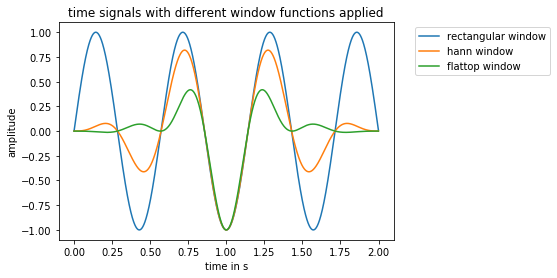

In [14]:
# Plot time signal with different window functions applied
plt.plot(time, y2)
plt.plot(time, y2hann)
plt.plot(time, y2flattop)
plt.legend(['rectangular window', 'hann window', 'flattop window'], bbox_to_anchor=(1.05, 1.0))
plt.title('time signals with different window functions applied')
plt.xlabel('time in s')
plt.ylabel('amplitude');

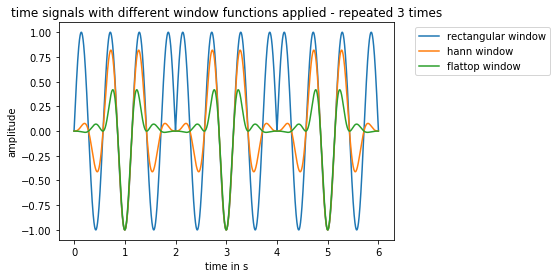

In [15]:
plt.plot(time_repeated, np.tile(y2, n_repetitions))
plt.plot(time_repeated, np.tile(y2hann, n_repetitions))
plt.plot(time_repeated, np.tile(y2flattop, n_repetitions))
plt.legend(['rectangular window', 'hann window', 'flattop window'], bbox_to_anchor=(1.05, 1.0))
plt.title('time signals with different window functions applied - repeated 3 times')
plt.xlabel('time in s')
plt.ylabel('amplitude');

The figure above demonstrates the effect of the window functions. If a rectangular window is applied, the signal is not continuously differentiable (see t=2 s and t=4 s). The window functions ensure that the repeated signal is continuously differentiable.

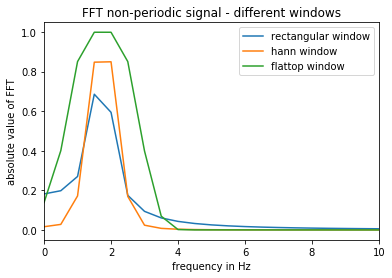

In [16]:
# Plot absoluate value of FFTs with different window functions
plt.plot(freq, abs(yfft2))
plt.plot(freq, abs(yfft2hann))
plt.plot(freq, abs(yfft2flattop))
plt.xlim(0, 10.0)
plt.legend(['rectangular window', 'hann window', 'flattop window'])
plt.title('FFT non-periodic signal - different windows')
plt.xlabel('frequency in Hz')
plt.ylabel('absolute value of FFT');

With the application of a window function, the leakage effect can be suppressed (see hann window). On the other hand, there are special window functions which primarily serve different purposes, e.g. the flattop window is used to recover the exact amplitude of the signal at the cost of an even broader "leakage".